# Projeto 1 - Visualização Computacional
Pedro Henrique Freitas Maiorano - 12701748

#O que compõe um filme de sucesso?

##Bibliotecas

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()
from wordcloud import WordCloud
from PIL import Image
from tables import index
import plotly.express as px
import plotly.graph_objects as go

#Introdução a base de dados

A base de dados escolhidas é a base de dados imdb_top_1000.

É uma base de dados que selecionou os filmes a partir de uma votação e categoriza-os pelos os seguintes atributos:

*  Series_Title = Nome do filme
*  Released_Year - Ano que em o filme foi lançado
*  Certificate - Certificate earned by that movie
*  Runtime - Tempo de duração
*  Genre - Genero
*  IMDB_Rating - Pontuação do filme segundo o IMDB
*  Overview - Visão geral do filme
*  Meta_score - Nota dada pelas pesquisas da empresa CinemaScore
*  Director - Nome do diretor
*  Star1,Star2,Star3,Star4 - Nome dos atores mais relevantes
*  Noofvotes - Números de votos
*  Gross - Dinheiro arrecadado pelo filme


# Objetivo do projeto

Se tratando de um top 1000 filmes escolhido por meio de votos, espera-se que todos sejam filmes de sucessos, os favoritos do público, logo o objetivo desse projeto é explorar os gostos das pessoas, ou seja, ver as principais similaridades que os compõe e quais características se destacam dentro desse ranking

#Preparação e processamento dos dados

In [2]:
#Leitura dos dados
data = pd.read_csv('imdb_top_1000.csv')
#Remoção de linhas duplicas(se houver)
data = data.drop_duplicates()
data_nan = data.dropna()
###
print("Número total de linhas e colunas:",data.shape)
print("Número de total de linhas sem NaN e colunas:",data_nan.shape) # Remover todas as entradas que possuem NaN

Número total de linhas e colunas: (1000, 16)
Número de total de linhas sem NaN e colunas: (714, 16)


Nota-se que existem 286 linhas com NaN(dados faltantes).

Estratégia de apenas retirar todas essas instâncias irão acarretar em uma perda muito grande de informação

Estratégias como substituir o valor faltante a partir de uma inferencia como o valor médio, e ainda fazer uma normalização ou até mesmo uma padronização com a finalidade de amenizar a discrepância entre esses votos não me parece funcionar muito bem pois se trata de quase 30% das entradas faltando algum valor.

Então a estratégia escolhida primeiramente será identificar se esses 'NaN' estão concentrados em algum atributo ou se estão espalhados e a partir disso tomar certas decisões como: evitar de explorar a fundo um atributo ou ter que adotar alguma técnica para lidar com isso


In [3]:
print("Atributos atuais:",data.columns) #Mostra todos os atributos
print("Colunas removidas:", data.columns[[1]]) #Removendo esse atributo
# Remove as linhas especificadas
data = data.drop(data.columns[0], axis=1) #Não é interessante para o projeto

print("Número total de linhas e colunas:",data.shape)

Atributos atuais: Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')
Colunas removidas: Index(['Series_Title'], dtype='object')
Número total de linhas e colunas: (1000, 15)


In [4]:
data=data.sort_values(by='No_of_Votes', ascending=False) #Organizando a tabela conforme o top 1000 votos
print(data.count())

Series_Title     1000
Released_Year    1000
Certificate       899
Runtime          1000
Genre            1000
IMDB_Rating      1000
Overview         1000
Meta_score        843
Director         1000
Star1            1000
Star2            1000
Star3            1000
Star4            1000
No_of_Votes      1000
Gross             831
dtype: int64


Podemos notar que os dados faltantes se agrupam em Certificate, Meta_Score e Gross

In [5]:
print(data[['No_of_Votes']].max())
print(data[['No_of_Votes']].min())

No_of_Votes    2343110
dtype: int64
No_of_Votes    25088
dtype: int64


Text(0, 0.5, 'Número de Votos')

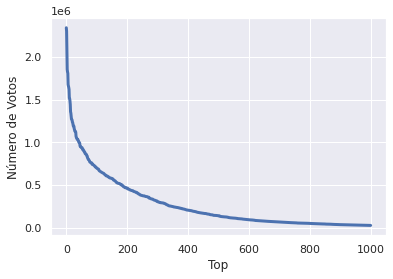

In [6]:
X=[]
for i in range(1000):
  X.append(i)
  
plt.plot(X,data[['No_of_Votes']],linewidth=3)
plt.xlabel('Top')
plt.ylabel('Número de Votos')

Nota-se uma diferença muito grande entre o primeiro e último colocado, então a partir disso resolvi plotar um gráfico evidenciando a diferença do número de votos entre os filmes, a seguir decidi fracionar os dados em 4 grupos de 250 entradas para não prejudicar a análise das similaridades, visto que os top 100 são dezenas de vezes "mais favoritos" do que o top 1000 

In [7]:
#Seprando em 4 grupos
data_1=data.iloc[0:250] #250 primeiros
data_2=data.iloc[250:500] #251 até os 500
data_3=data.iloc[500:750] #501 até o 750
data_4=data.iloc[750:1000] #751 até o 1000

In [8]:
#Verificar a existencia de dados faltantes
print(data_1.count())

Series_Title     250
Released_Year    250
Certificate      250
Runtime          250
Genre            250
IMDB_Rating      250
Overview         250
Meta_score       250
Director         250
Star1            250
Star2            250
Star3            250
Star4            250
No_of_Votes      250
Gross            249
dtype: int64


In [9]:
print(data_2.count())

Series_Title     250
Released_Year    250
Certificate      243
Runtime          250
Genre            250
IMDB_Rating      250
Overview         250
Meta_score       236
Director         250
Star1            250
Star2            250
Star3            250
Star4            250
No_of_Votes      250
Gross            230
dtype: int64


In [10]:
print(data_3.count())

Series_Title     250
Released_Year    250
Certificate      216
Runtime          250
Genre            250
IMDB_Rating      250
Overview         250
Meta_score       203
Director         250
Star1            250
Star2            250
Star3            250
Star4            250
No_of_Votes      250
Gross            199
dtype: int64


In [11]:
print(data_4.count())

Series_Title     250
Released_Year    250
Certificate      190
Runtime          250
Genre            250
IMDB_Rating      250
Overview         250
Meta_score       154
Director         250
Star1            250
Star2            250
Star3            250
Star4            250
No_of_Votes      250
Gross            153
dtype: int64


Vemos que conforme o favoritismo do público vai diminuindo(número de votos menor) a falta de informações a respeito do filme vai aumentando.

# Visualização a partir dos títulos

In [12]:
#Função que transforma os titulos de um grupo em texto
def TransformText(data_1):
  data_1_nome=data_1['Series_Title']
  data_1_nome=data_1_nome.to_numpy()
  palavras=[]
  for i in data_1_nome:
    lista = i.split(" ")
    for i in lista:
      i=i.replace(":","") # Remover os : das palavras
      palavras.append(i)
  texto=("")
  for i in palavras:
   texto = texto + " " + i
  texto=texto[1:] #Removendo o primeiro espaço
  return texto

#Textos de título para os 4 grupos
texto1 = TransformText(data_1)
texto2 = TransformText(data_2)
texto3 = TransformText(data_3)
texto4 = TransformText(data_4)

In [13]:
wordcloud1 = WordCloud(width=480, height=480, margin=0, colormap="Blues").generate(texto1)
wordcloud2 = WordCloud(width=480, height=480, margin=0, colormap="Blues").generate(texto2)
wordcloud3 = WordCloud(width=480, height=480, margin=0, colormap="Blues").generate(texto3)
wordcloud4 = WordCloud(width=480, height=480, margin=0, colormap="Blues").generate(texto4)

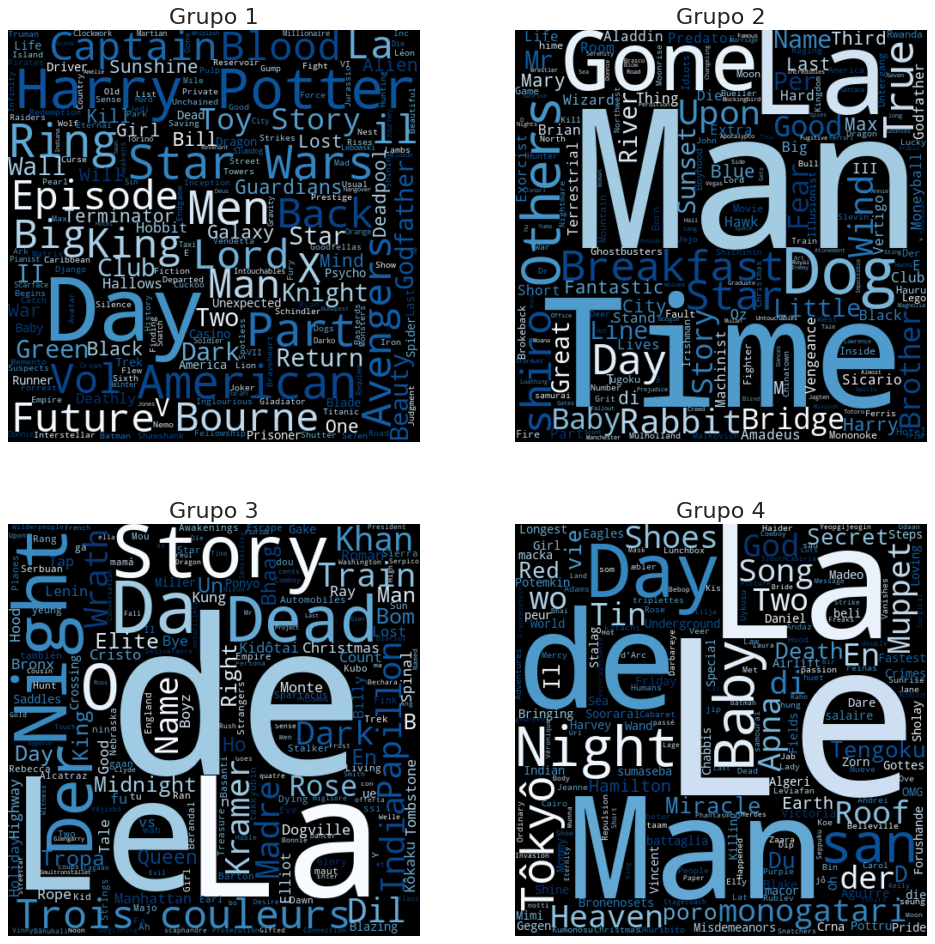

In [14]:
plt.figure(figsize=(15,15),dpi=80)

plt.subplot(2,2,1)
plt.title("Grupo 1",size=20)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

plt.subplot(2,2,2)
plt.title("Grupo 2",size=20)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

plt.subplot(2,2,3)
plt.title("Grupo 3",size=20)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

plt.subplot(2,2,4)
plt.title("Grupo 4",size=20)
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

Fiz essa visualização com o objetivo de expor palavras chaves que compõe filmes de sucessos, porém acabou expondo que dentro desse conjunto de filmes existem uma porção de filmes com continuação. De certo modo é um pouco redundante, afinal se o filme possui uma continuação é bem provável que ele tenha feito sucesso.

Mas analisando de nabeura geral conseguimos encontrar palavras bem presentes(algumas devido a filmes com sequências)

Fazendo uma análise mais fria a visualização por meio de palavras que compóe o título da longametragem acaba privilegiando filmes com contianuação, visto que nesses casos muitas palavras irão se repetir. Agora, se o objetivo for buscar palavras chaves, acredito que o ideal seria filtrar melhor os dados e excluir as continuações

# Visualização a partir do ano de lançamento

In [15]:
#Recriar os data frames por ano + contagem
data_1_ano=data_1['Released_Year'] #filtra somente os anos
data_1_ano=data_1_ano.value_counts() # freq  dos anos
data_1_ano=data_1_ano.to_frame() #transforma de series para data frame
data_1_ano = data_1_ano.reset_index() #transforma o index para uma coluna do data frame

print(data_1_ano.shape)

(56, 2)


Vemos que apenas utilizar os dados dessa forma é algo bem problemático visto que após filtrar por 'ano de lançamento' os dados passam a ter 56 entradas, número muito expressivo que dificulta a visualização. Então, para não perder informação,apenas ocultá-la, decidi agrupar em décadas, se iniciando nos anos 40( pois o filme mais antigo teve lançamento em 1941) 

In [16]:
#Recriar os data frames por ano + contagem
def ano_count(data_1):
  data_1_ano=data_1['Released_Year'] #filtra somente os anos
  data_1_ano=data_1_ano.value_counts() # freq  dos anos
  data_1_ano=data_1_ano.to_frame() #transforma de series para data frame
  data_1_ano = data_1_ano.reset_index() #transforma o index para uma coluna do data frame
  data_1_ano= data_1_ano.replace("PG","1995") ## Existe uma linha no grupo 2 onde um dos dados foi digitado errado e se encontra como "PG", mas era para ser 1995

  data_T=data_1_ano.to_numpy()
  ##Criando um array com as decadas
  anos=np.array([[1920,0],[1930,0],[1940,0],[1950,0],[1960,0],[1970,0],[1980,0],[1990,0],[2000,0],[2010,0],[2020,0]])
  for i in data_T:
    k = int(i[0])
    for j in range(len(anos)):
     m = anos[j]
     if j == 10:
      n = [2030]
     else:
      n = anos[j+1]

     if k >= m[0] and k < n[0]:
        m[1]= m[1] +i[1]
#Transformando o array em um data frame
  anos=pd.DataFrame(anos,columns=['Década','Freq'])
  anos = anos.sort_values(by='Freq')
  anos=anos.drop(anos[(anos.Freq == 0)].index)
  return anos

In [17]:
anos1 = ano_count(data_1)
anos2 = ano_count(data_2)
anos3 = ano_count(data_3)
anos4 = ano_count(data_4)

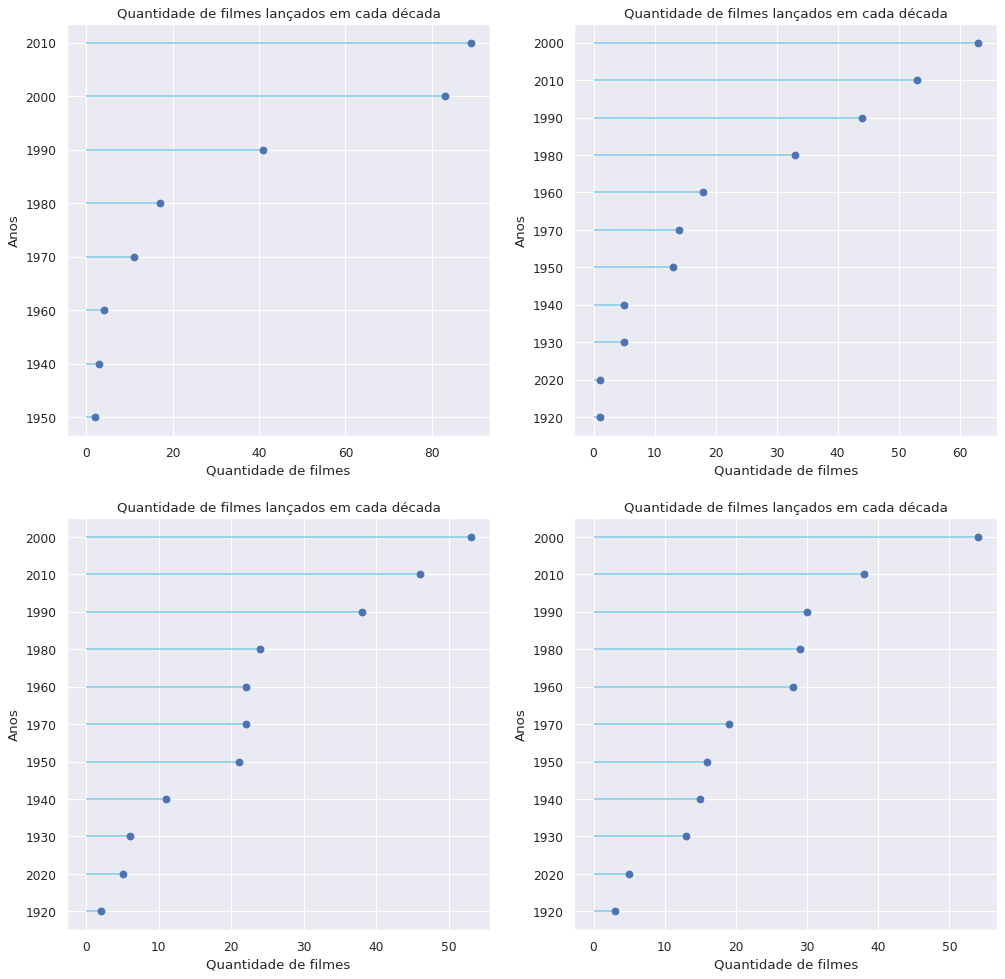

In [18]:
# Reorder it based on the values

my_range1=range(1,len(anos1.index)+1)
my_range2=range(1,len(anos2.index)+1)
my_range3=range(1,len(anos3.index)+1)
my_range4=range(1,len(anos4.index)+1)

plt.figure(figsize=(15,15),dpi=80)
#Grupo1
plt.subplot(2,2,1)
plt.hlines(y=my_range1, xmin=0, xmax=anos1['Freq'], color='skyblue')
plt.plot(anos1['Freq'],my_range1, "o")
plt.yticks(my_range1, anos1['Década'])
plt.title("Quantidade de filmes lançados em cada década", loc='center')
plt.xlabel('Quantidade de filmes')
plt.ylabel('Anos')

#Grupo2 
plt.subplot(2,2,2)
plt.hlines(y=my_range2, xmin=0, xmax=anos2['Freq'], color='skyblue')
plt.plot(anos2['Freq'],my_range2, "o")
plt.yticks(my_range2, anos2['Década'])
plt.title("Quantidade de filmes lançados em cada década", loc='center')
plt.xlabel('Quantidade de filmes')
plt.ylabel('Anos')

#Grupo3
plt.subplot(2,2,3)
plt.hlines(y=my_range3, xmin=0, xmax=anos3['Freq'], color='skyblue')
plt.plot(anos3['Freq'],my_range3, "o")
plt.yticks(my_range3, anos2['Década'])
plt.title("Quantidade de filmes lançados em cada década", loc='center')
plt.xlabel('Quantidade de filmes')
plt.ylabel('Anos')

#Grupo4
plt.subplot(2,2,4)
plt.hlines(y=my_range4, xmin=0, xmax=anos4['Freq'], color='skyblue')
plt.plot(anos4['Freq'],my_range4, "o")
plt.yticks(my_range4, anos2['Década'])
plt.title("Quantidade de filmes lançados em cada década", loc='center')
plt.xlabel('Quantidade de filmes')
plt.ylabel('Anos')


plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

Vemos que dentre os 1000 filmes mais votados existe uma certa "soberania" de filmes atuais", fato esse que deve ser explicado pelos seguintes aspectos



*   A tecnologia evoluiu, logo além de se produzir mais filmes, eles ainda contam com uma produção de qualidade maior(como efeitos especiais por exemplo)
*   Quem votou provavelmente consome mais material da era que em que vive


A partir do lolipop plot chega-se a conclusão de que mais de 80% dos 250 filmes mais votados foram produzidos a partir da década de 90

Porém nos grupos dos filmes "menos votados" observa-se a ascensção de filmes mais antigos, muito provavelmente representam filmes clássicos e conhecidos pela população mais velha.


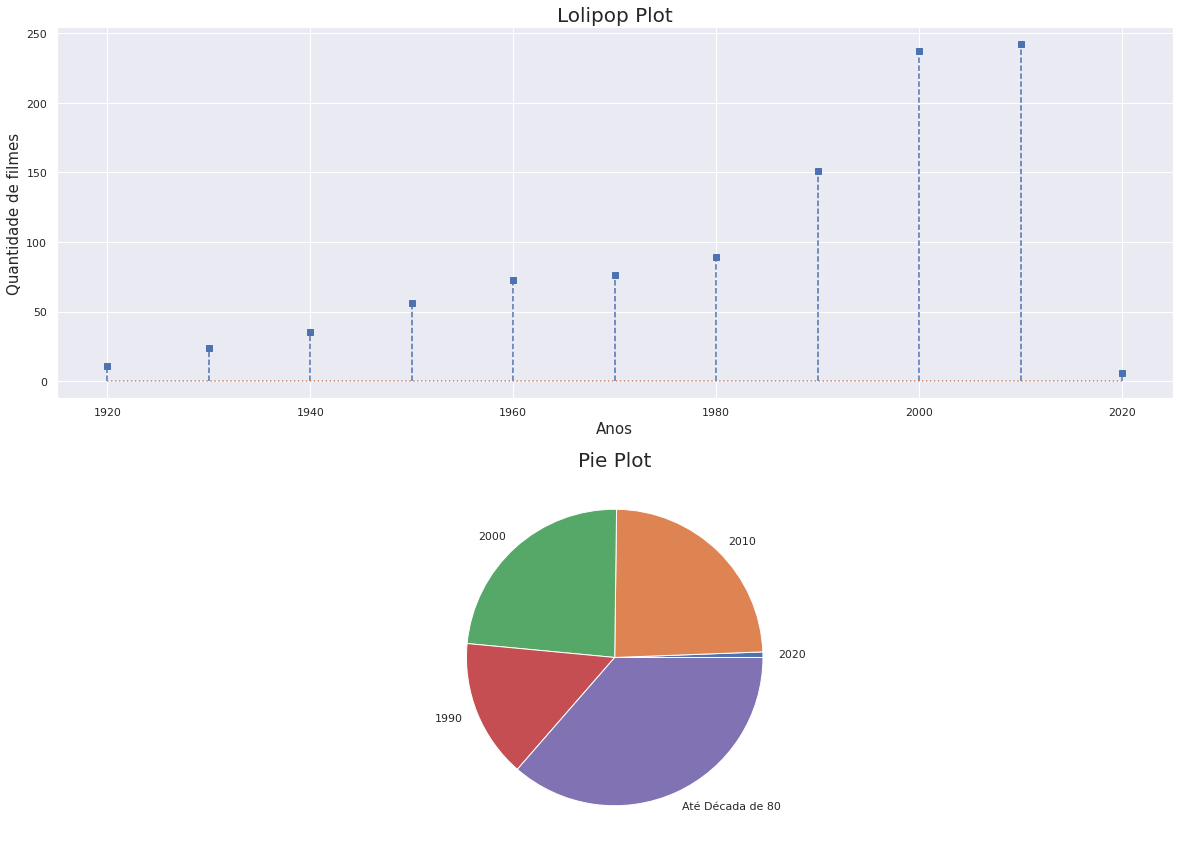

<Figure size 360x360 with 0 Axes>

In [19]:
data_ano_total=ano_count(data)#para o lolipop plot 
#Para o gráfico pie
k=data_ano_total['Freq'].to_numpy()
k=np.array([['2020',6],['2010',242],['2000',237],['1990',151],['Até Década de 80',sum(k[1:8])]])

data_ano_pie=pd.DataFrame(k,columns=['Década','Freq'])




plt.figure(figsize=(20,15))

plt.subplot(2,1,1)

plt.stem(data_ano_total['Década'], data_ano_total['Freq'], markerfmt = 's', linefmt='--', basefmt = ':', use_line_collection=True)
plt.title('Lolipop Plot', size=20)
plt.xlabel('Anos', size=15)
plt.ylabel('Quantidade de filmes',size=15)


plt.subplot(2,1,2)

plt.pie(data_ano_pie['Freq'], labels= data_ano_pie['Década'])
plt.title('Pie Plot', size=20)
plt.figure(figsize=(5,5))
plt.subplots_adjust(hspace=10,wspace=3)
plt.show()

Agora uma visualização geral, vemos uma concentração de filmes a partir da decada de 80(ou seja 1990). Vale ressaltar que o atributo "Até Década de 80" reuni filmes de 1920 até o inicio de 1990, então representa 70 anos de cinema.

#Visualização a partir do gênero

A visualização do gênero foi separadas em duas frentes.
Uma das frentes contempla a quantidade do gênero presente dentro dos filmes e a outra frente admite uma métrica a fim de valorizar filmes com menos gêneros.

exemplificando:
Filme - 1 : Gênero: romance,comédia,drama
Filme - 2 : Gênero: romance,drama
Filme - 3 : Gênero: terror

Frente 1 teremos como resultado:


*   romance = 2
*   drama = 2
*   comédia = 1
*   terror = 1

Frente 2 teremos como resultado:

*  terror = 1
*  romance = 0.8333
*  drama = 0.8333
*  comédia = 0.333

A frente 2 ela funciona com a métrica de atribuir valor 1 para o gênero e dividir igualmente entre os gêneros que compõe o filme e a partir disso somar com o de todos os filmes e fazer a visualização

Ambas as Frentes são interessantes, na frente 1 estou preocupado em mostrar a presença dos gêneros dentro de todos os filmes.


Agora na frente 2 estou preocupado quão impactante é um gênero dentro de todos, se um filme1 tem sucesso a partir de apenas 1 gênero enquanto o filme2 tem sucesso utilizando 2 ou mais gêneros cabe a dizer que o gênero do filme1 teve mais impacto.





##Frente 1

In [20]:
def Frente_1(data_1):
  data_1_genero = data_1['Genre']
  data_1_genero=data_1_genero.to_numpy()
  Generos=[]
  NovaLista=[]
  dict={}
  for i in range(250):
   k=data_1_genero[i].split(", ")
   NovaLista.append(k)

  for i in NovaLista:
     for j in i:
      if not j in Generos:
        Generos.append(j)
      dict[j] = dict.get(j, 0) + 1

  df1=pd.DataFrame(dict,index=[0])
  df1=df1.T
  df1=df1.reset_index()
  df1=df1.rename(columns={'index':'Gênero',0:'Quantidade'})
  df1=df1.sort_values(by='Quantidade')

  return df1

In [21]:
data_1_genero_1 = Frente_1(data_1)
data_2_genero_1 = Frente_1(data_2)
data_3_genero_1 = Frente_1(data_3)
data_4_genero_1 = Frente_1(data_4)
data_genero_1=[data_1_genero_1,data_2_genero_1,data_3_genero_1,data_4_genero_1]

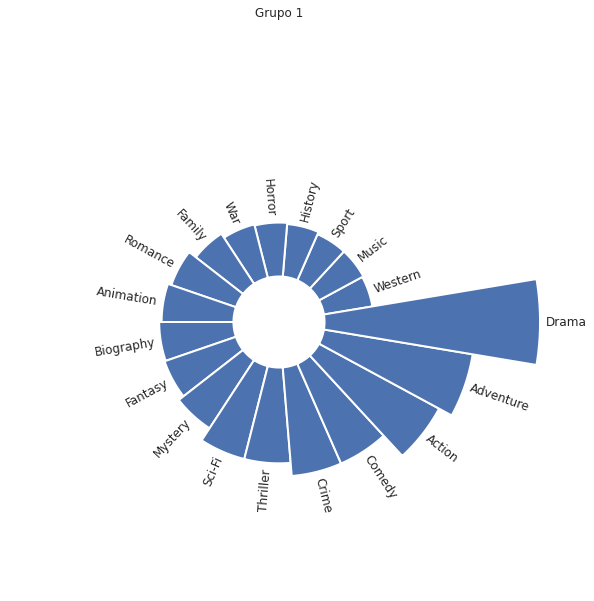

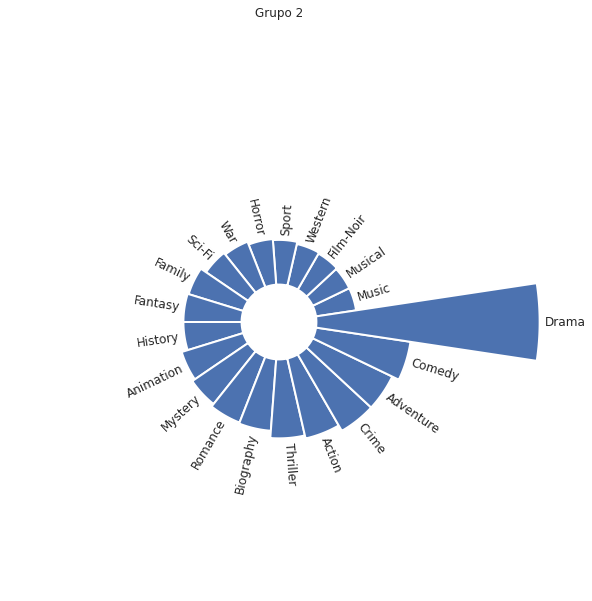

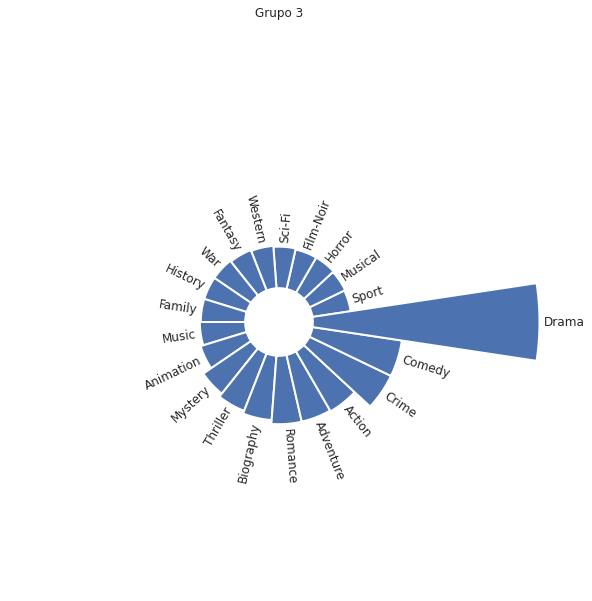

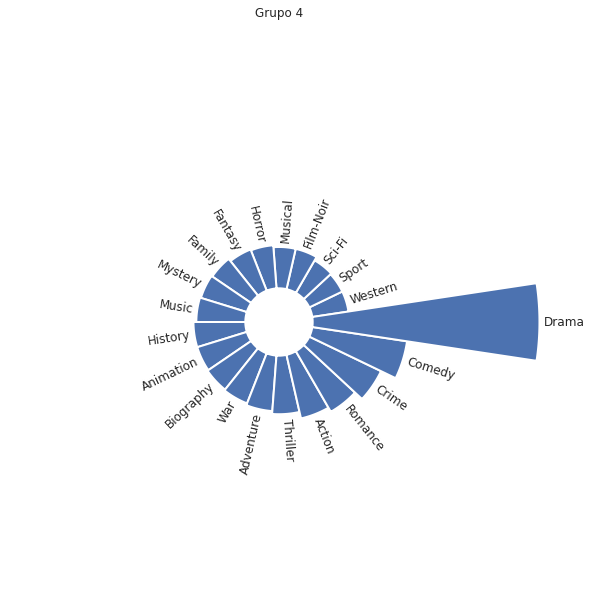

In [22]:
j=0
for i in data_genero_1:
  j=j+1
  plt.figure(figsize=(20,10))
  plt.subplot(2,2,j)
  # plot polar axis
  ax = plt.subplot(111, polar=True)
  plt.title('Grupo '+str(j))
  # remove grid
  plt.axis('off')

  # Set the coordinates limits
  upperLimit = 100
  lowerLimit = 30

  # Compute max and min in the dataset
  max = i['Quantidade'].max()

  # Let's compute heights: they are a conversion of each item value in those new coordinates
  # In our example, 0 in the dataset will be converted to the lowerLimit (10)
  # The maximum will be converted to the upperLimit (100)
  slope = (max - lowerLimit) / max
  heights = slope * i.Quantidade + lowerLimit

  # Compute the width of each bar. In total we have 2*Pi = 360°
  width = 2*np.pi / len(i.index)

  # Compute the angle each bar is centered on:
  indexes = list(range(1, len(i.index)+1))
  angles = [element * width for element in indexes]
  angles

  # Draw bars
  bars = ax.bar(
      x=angles, 
      height=heights, 
      width=width, 
      bottom=lowerLimit,
      linewidth=2, 
      edgecolor="white")

  # little space between the bar and the label
  labelPadding = 4

  # Add labels
  for bar, angle, height, label in zip(bars,angles, heights, i['Gênero']):

      # Labels are rotated. Rotation must be specified in degrees :(
      rotation = np.rad2deg(angle)

      # Flip some labels upside down
      alignment = ""
      if angle >= np.pi/2 and angle < 3*np.pi/2:
          alignment = "right"
          rotation = rotation + 180
      else: 
          alignment = "left"

      # Finally add the labels
      ax.text(
          x=angle, 
          y=lowerLimit + bar.get_height() + labelPadding, 
          s=label, 
          ha=alignment, 
          va='center', 
          rotation=rotation, 
          rotation_mode="anchor") 
  plt.subplots_adjust(hspace=0)
plt.show()

##Frente 2


In [23]:
def Frente_2(data_1):
  data_1_genero = data_1['Genre']
  data_1_genero=data_1_genero.to_numpy()
  Generos=[]
  NovaLista=[]
  dict={}
  for i in range(250):
   k=data_1_genero[i].split(", ")
   NovaLista.append(k)

  for i in NovaLista:
     size = len(i)
     tamanho = 1/size
     for j in i:
      if not j in Generos:
        Generos.append(j)
      dict[j] = dict.get(j, 0) + tamanho

  df=pd.DataFrame(dict,index=[0])
  df=df.T
  df=df.reset_index()
  df=df.rename(columns={'index':'Gênero',0:'Quantidade'})
  df=df.sort_values(by='Quantidade')
  return df

In [24]:
data_1_genero_2 = Frente_2(data_1)
data_2_genero_2 = Frente_2(data_2)
data_3_genero_2 = Frente_2(data_3)
data_4_genero_2 = Frente_2(data_4)
data_genero_2=[data_1_genero_2,data_2_genero_2,data_3_genero_2,data_4_genero_2]


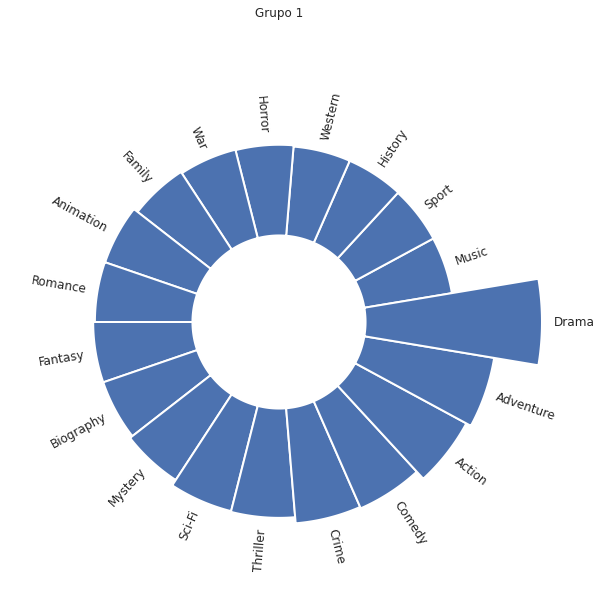

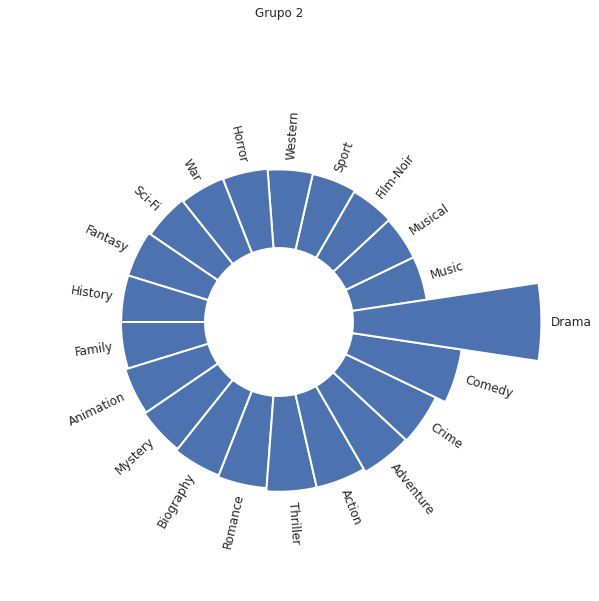

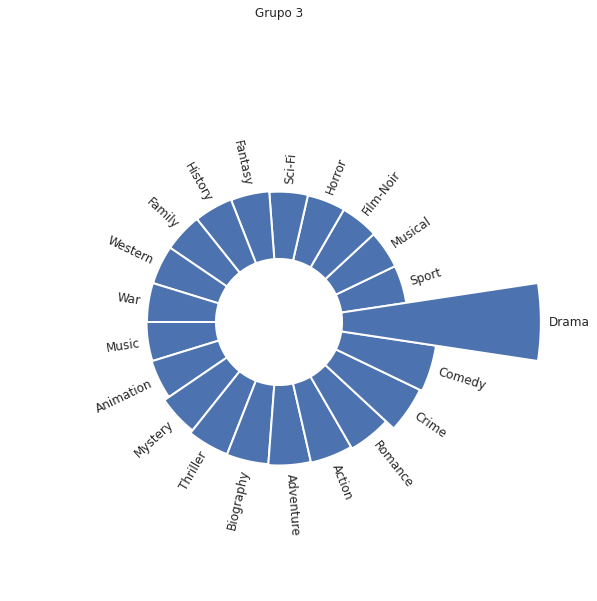

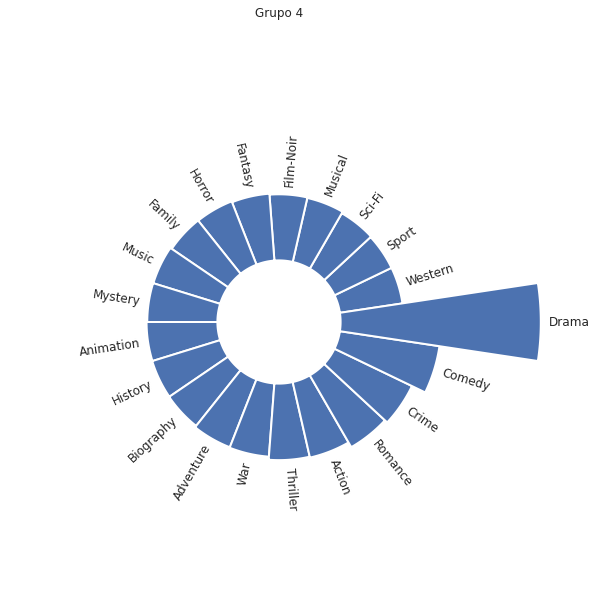

In [25]:
j=0
for i in data_genero_2:
  j=j+1
  plt.figure(figsize=(20,10))
  plt.subplot(2,2,j)
  # plot polar axis
  ax = plt.subplot(111, polar=True)
  plt.title('Grupo '+str(j))
  # remove grid
  plt.axis('off')

  # Set the coordinates limits
  upperLimit = 100
  lowerLimit = 30

  # Compute max and min in the dataset
  max = i['Quantidade'].max()

  # Let's compute heights: they are a conversion of each item value in those new coordinates
  # In our example, 0 in the dataset will be converted to the lowerLimit (10)
  # The maximum will be converted to the upperLimit (100)
  slope = (max - lowerLimit) / max
  heights = slope * i.Quantidade + lowerLimit

  # Compute the width of each bar. In total we have 2*Pi = 360°
  width = 2*np.pi / len(i.index)

  # Compute the angle each bar is centered on:
  indexes = list(range(1, len(i.index)+1))
  angles = [element * width for element in indexes]
  angles

  # Draw bars
  bars = ax.bar(
      x=angles, 
      height=heights, 
      width=width, 
      bottom=lowerLimit,
      linewidth=2, 
      edgecolor="white")

  # little space between the bar and the label
  labelPadding = 4

  # Add labels
  for bar, angle, height, label in zip(bars,angles, heights, i['Gênero']):

      # Labels are rotated. Rotation must be specified in degrees :(
      rotation = np.rad2deg(angle)

      # Flip some labels upside down
      alignment = ""
      if angle >= np.pi/2 and angle < 3*np.pi/2:
          alignment = "right"
          rotation = rotation + 180
      else: 
          alignment = "left"

      # Finally add the labels
      ax.text(
          x=angle, 
          y=lowerLimit + bar.get_height() + labelPadding, 
          s=label, 
          ha=alignment, 
          va='center', 
          rotation=rotation, 
          rotation_mode="anchor") 
  plt.subplots_adjust(hspace=0)
plt.show()

##Análise

Após observar os resultados para os 4 grupos em ambas as abordagens não se encontra uma distinção dos gêneros de filmes. A partir disso resolvi recriar a visualizaçào mas contemplando todos os grupos de uma vez 

In [26]:
data_genero_1=Frente_1(data)
data_genero_2=Frente_2(data)
data_genero_T=[data_genero_1,data_genero_2]

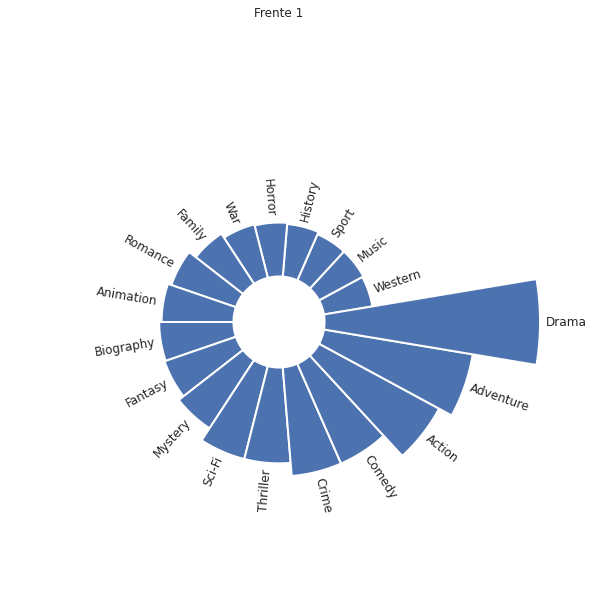

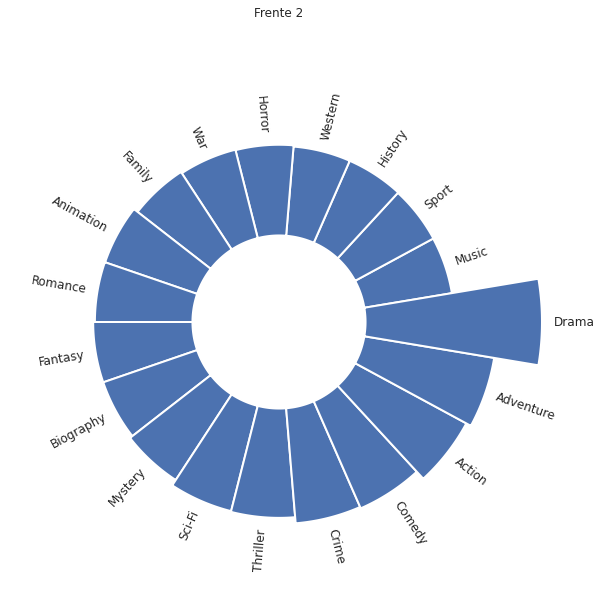

In [27]:
j=0
for i in data_genero_T:
  j=j+1
  plt.figure(figsize=(20,10))
  plt.subplot(2,2,j)
  # plot polar axis
  ax = plt.subplot(111, polar=True)
  plt.title('Frente '+str(j))
  # remove grid
  plt.axis('off')

  # Set the coordinates limits
  upperLimit = 100
  lowerLimit = 30

  # Compute max and min in the dataset
  max = i['Quantidade'].max()

  # Let's compute heights: they are a conversion of each item value in those new coordinates
  # In our example, 0 in the dataset will be converted to the lowerLimit (10)
  # The maximum will be converted to the upperLimit (100)
  slope = (max - lowerLimit) / max
  heights = slope * i.Quantidade + lowerLimit

  # Compute the width of each bar. In total we have 2*Pi = 360°
  width = 2*np.pi / len(i.index)

  # Compute the angle each bar is centered on:
  indexes = list(range(1, len(i.index)+1))
  angles = [element * width for element in indexes]
  angles

  # Draw bars
  bars = ax.bar(
      x=angles, 
      height=heights, 
      width=width, 
      bottom=lowerLimit,
      linewidth=2, 
      edgecolor="white")

  # little space between the bar and the label
  labelPadding = 4

  # Add labels
  for bar, angle, height, label in zip(bars,angles, heights, i['Gênero']):

      # Labels are rotated. Rotation must be specified in degrees :(
      rotation = np.rad2deg(angle)

      # Flip some labels upside down
      alignment = ""
      if angle >= np.pi/2 and angle < 3*np.pi/2:
          alignment = "right"
          rotation = rotation + 180
      else: 
          alignment = "left"

      # Finally add the labels
      ax.text(
          x=angle, 
          y=lowerLimit + bar.get_height() + labelPadding, 
          s=label, 
          ha=alignment, 
          va='center', 
          rotation=rotation, 
          rotation_mode="anchor") 
  plt.subplots_adjust(hspace=0)
plt.show()

Vemos que os gêneros Drame,Adventure e Action são os gêneros mais presentes nos filmes escolhidos pelo público.
Quanto a "imporância" dos gêneros vemos esse top3 preservando o pódio porém a discrepância entre os gêneros diminuiram

#Visualização Geral

##Visualização de ano de lançamento, duração do filme e número de votos

In [ ]:
#Refazendo o data frame
data_G_LDN=data.drop(columns=['Series_Title', 'Certificate',
                              'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'Gross'])
data_G_LDN= data_G_LDN.replace("PG","1995")

for i in range(1000):
  k = data_G_LDN['Runtime'][i]
  k=k.replace(" min","")
  k=int(k)
  data_G_LDN['Runtime'][i]=k

In [ ]:
data_G_LDN= data_G_LDN.replace("PG","1995")
data_G_LDN.columns
for i in range(1000):
  k=int(data_G_LDN['Released_Year'][i])
  if k <= 1989:
    data_G_LDN['Released_Year'][i]='Até Década de 1980'
  elif k <= 1999:
    data_G_LDN['Released_Year'][i]='Década de 1990'
  elif k <= 2009:
    data_G_LDN['Released_Year'][i]='Década de 2000'
  elif k <= 2019:
    data_G_LDN['Released_Year'][i]='Década de 2010'

data_G_LDN['Released_Year']=data_G_LDN['Released_Year'].replace('Até Década de 1980',0)
data_G_LDN['Released_Year']=data_G_LDN['Released_Year'].replace('Década de 1990',1)
data_G_LDN['Released_Year']=data_G_LDN['Released_Year'].replace('Década de 2000',2)
data_G_LDN['Released_Year']=data_G_LDN['Released_Year'].replace('Década de 2010',3)
data_G_LDN['Released_Year']=data_G_LDN['Released_Year'].replace('2020',4)

In [77]:

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = data_G_LDN['Released_Year'],
                   colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']]),
        dimensions = list([
            dict(range = [0,4],
                 tickvals = [0,1,2,3,4],
                label = 'Ano de lançamento', values = data_G_LDN['Released_Year'],
                ticktext=['Até Década de 1980','Década de 1990','Década de 2000','Década de 2010','2020']),

            dict(range = [45,321],
                label = 'Tempo de duração', values = data_G_LDN['Runtime']),
                
            dict(range = [data_G_LDN['No_of_Votes'].min(),data_G_LDN['No_of_Votes'].max()],
                label = 'Número de votos', values = data_G_LDN['No_of_Votes']),
           
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

Essa última visualização conta com recursos interativos entre o gráfico e o usuário, a partir dela podemos expor de uma outra maneira o que já foi exposto somado com o tempo de duração.
vale notar que o tempo máximo de duração é de 321 minutos, mas após pesquisas acerca do filme conclui-se que é um erro de digitaçao e seu valor deveria ser de 160 min